# Secretary Problem

A project for the `Statistics and Life` Course.

### Problem Description
If you haven't heard of this problem before, you can look it up __[here](https://en.wikipedia.org/wiki/Secretary_problem)__ to get the comprehensive knowledge about it.   
   
Basically, it's a problem about selecting the best option in n candidates. Apparently, there will be a value for each option, and your goal is to find the best one under some constraints. The constraint is that you can only view one option at a time, and after the option is viewed, you could either discard the option or select it as your final answer. Once an option is discarded, you cannot recall it.   

### 37-Rule Solution
One of the solutions to this problem is the __37-rule__. The concept is to discard the first m percent of the options, and memorize the greatest value x among the first m%. Then, once you find an option which have a value greater than x, you immediately select it.   
**37-rule tells us that when m is 37, you will have the highest probability to get the best option.**   

If you're interested in the scientific explanation about the 37 rule, here are some articles that I think are easy to understand.

1. https://plus.maths.org/content/mathematical-dating
2. https://math.stackexchange.com/questions/391313/deriving-the-37-percent-rule-for-dating

### Goal
Although it has been proven that 37(or to be more specific, 1/e) can maximize the opportunity of selecting the best applicant, we still want to try it out and see if experiment matches the theory. The goal is to use python to simulate the solution with different value of m, and draw the result graphs to verify if the 37-rule is true.

# Simulation

The following script uses `python3`

### Import Modules

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
import matplotlib.pyplot as plt

### Generateing Data
First, we would like to have a random sample of integers to get start with.<br><br>
We use the `scipy.stats.norm` module to create a normal distribution random variable for our sample.   
Let's assume that the average score for the candidates is 60 and the standard deviation is 5.

In [2]:
mean = 60
std = 5
rv = norm(mean, std)

<br>
We can generate a random sample from the random variable by the method `rvs`

In [3]:
rv.rvs(size=10)

array([60.51945085, 60.44157069, 61.51572682, 66.88167592, 52.79732107,
       63.42051493, 53.81232326, 57.1073845 , 60.28267668, 61.57190825])

<br>
Let's draw a probability density function for our random variable to have a better idea about the random variable

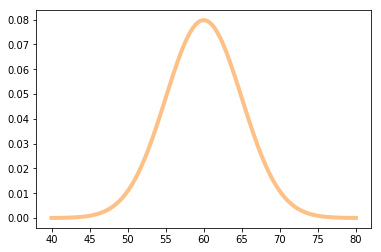

In [4]:
std_num = 4 # determine how width the distribution will be
mean, std = rv.mean(), rv.std()

xs = np.linspace(mean - std_num*std, mean + std_num*std, 100)
ys = rv.pdf(xs)
    
plt.plot(xs, ys, linewidth=4, color='#fdc086')

### Simulate
Now we have our data ready, its time to construct a function that simulates the stopping rule:<br>
We let the **m%** and **sample** to be the input of the function, and the function will return the result that it gets from the stopping rule.

In [5]:
def m_rule(sample:list, m:int, scale:int=100):
    """Simulate the m_rule on the input sample, and return the result."""
    
    actual_thresh = int(round(len(sample)*m/scale, 1))

    if actual_thresh == 0:
        return(sample[0])

    # find the best value within threshhold
    best_in_thresh = sample[0]
    for value in sample[:actual_thresh]:
        best_in_thresh = value if value > best_in_thresh else best_in_thresh

    # find the result
    for value in sample[actual_thresh:]:
        if value > best_in_thresh:
            return(value)

    # if the best value is in the threshhold unfortunately, return the last value in sample.
    return(sample[-1])
    

<br>
Let's try it with with a single sample with 100 data in it.

In [28]:
sample = rv.rvs(100)
print(sample)

[59.62815379 60.58021957 57.04407734 65.46908452 68.01734382 62.24296773
 68.51492455 60.97988153 57.22537995 61.89730418 63.89131336 56.42697582
 60.85282374 54.64222546 53.19196245 57.17997802 69.32610812 67.21895671
 65.98421949 57.22571457 59.4197312  65.87361803 54.7552024  61.55987581
 64.02142214 64.32695761 56.04817449 65.5758906  57.23524687 63.83618147
 62.86037846 67.30698926 53.85813571 63.61614124 55.60032044 58.55109571
 58.59701266 61.69711063 57.35516783 55.70534919 60.48114906 62.51280279
 62.06521583 65.13420553 70.75347042 48.67565069 60.10281041 55.9868773
 56.15053086 61.0804269  62.31445236 65.57252013 54.64107366 60.80524464
 66.83734185 61.61139458 66.19600334 62.08092632 63.47137748 56.82098924
 53.1714672  64.52024037 65.7306687  59.00292834 48.86187216 59.98257407
 48.38223462 55.40427539 62.1171116  54.88348352 53.31892368 50.81573361
 62.23581257 55.44536254 67.77387687 57.51998023 65.74219444 64.69650554
 55.64128995 55.19860984 72.0754416  48.56728856 62.

In [29]:
m = 5
result = m_rule(sample, m)
print(result)

68.51492454564612


In [30]:
m = 30
result = m_rule(sample, m)
print(result)

70.75347042206315


In [31]:
m = 50
result = m_rule(sample, m)
print(result)

72.07544160124424


In [32]:
m = 80
result = m_rule(sample, m)
print(result)

72.07544160124424


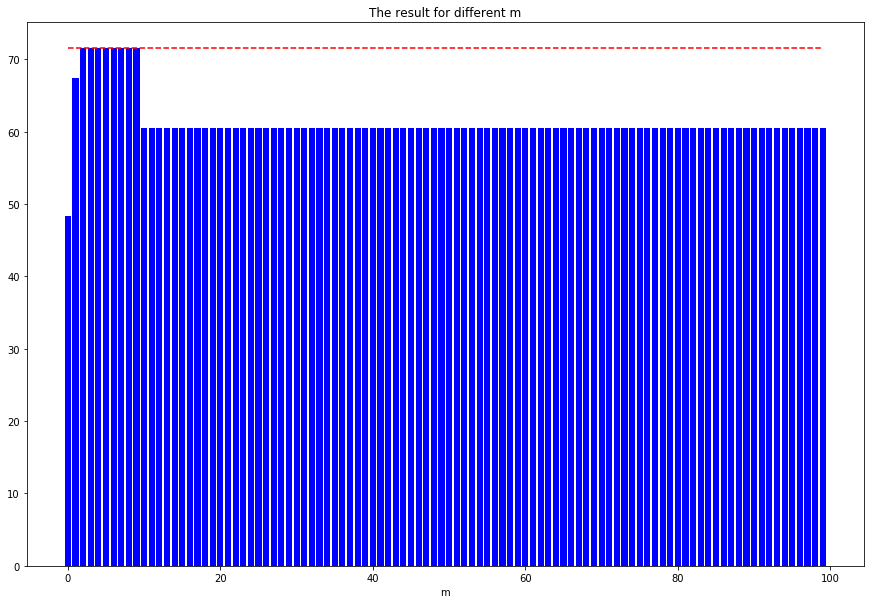

In [33]:
sample = rv.rvs(100)

results = []
for m in range(100):
    m_result = m_rule(sample, m)
    results.append(m_result)

fig, ax = plt.subplots(figsize=(15, 10))
xs = np.linspace(0, 99, 100)

#plot the best value in sample as a line
line_value = [max(sample) for i in range(len(xs))]
ax.plot(xs, line_value, 'r--')

#plot the results as bar charts
ax.bar(xs, results, color="blue")
  
ax.set_title('The result for different m')
ax.set_xlabel('m')

plt.show()

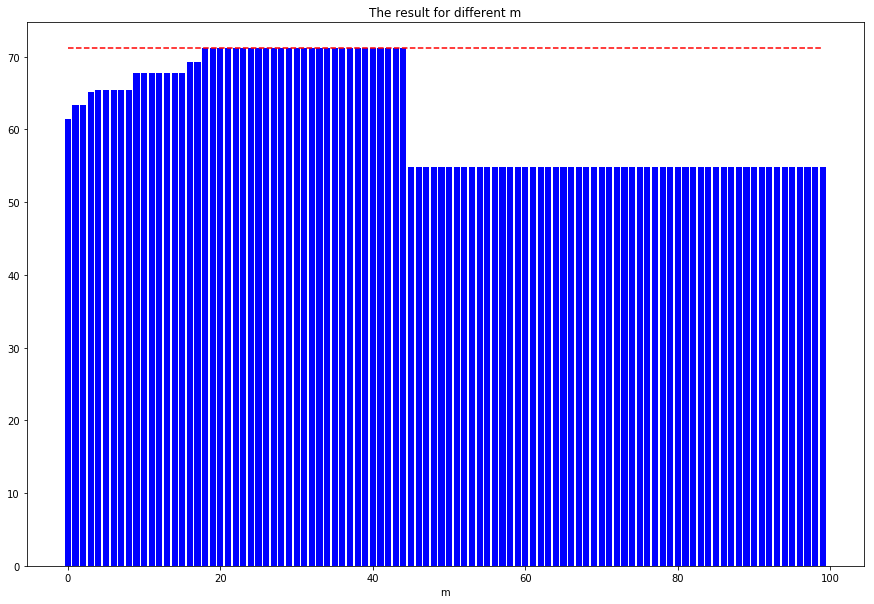

In [12]:
sample = rv.rvs(100)

results = []
for m in range(100):
    m_result = m_rule(sample, m)
    results.append(m_result)

fig, ax = plt.subplots(figsize=(15, 10))
xs = np.linspace(0, 99, 100)

#plot the best value in sample as a line
line_value = [max(sample) for i in range(len(xs))]
ax.plot(xs, line_value, 'r--')

#plot the results as bar charts
ax.bar(xs, results, color="blue")
  
ax.set_title('The result for different m')
ax.set_xlabel('m')

plt.show()

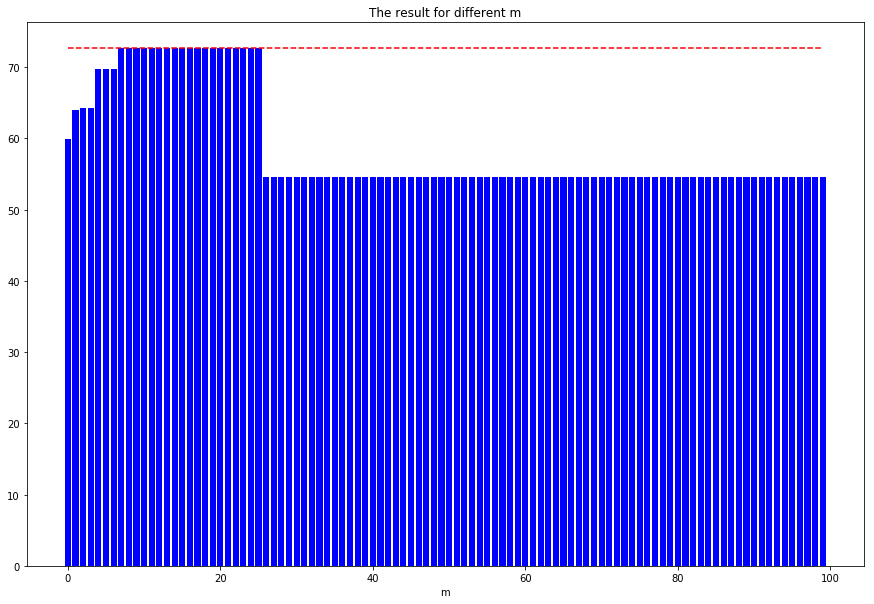

In [13]:
sample = rv.rvs(100)

results = []
for m in range(100):
    m_result = m_rule(sample, m)
    results.append(m_result)

fig, ax = plt.subplots(figsize=(15, 10))
xs = np.linspace(0, 99, 100)

#plot the best value in sample as a line
line_value = [max(sample) for i in range(len(xs))]
ax.plot(xs, line_value, 'r--')

#plot the results as bar charts
ax.bar(xs, results, color="blue")
  
ax.set_title('The result for different m')
ax.set_xlabel('m')

plt.show()

From the above plot, it seems that it is hard to tell which m is the best value for the stopping rule,<br>because the results varies a lot from each simulation.<br><br>
Therefore, let's **do the simulation multiple times and see which m has the best chance to get the greatest value**.

### Multiple Simulation
We save all the results for different m in each simulation in a big 2D numpy array **result**,<br>
and the best value in each simulation in a numpy array **best_values**

In [25]:
simulate_freq = 10
sample_size = 100
m_scale = 100

result = np.empty(shape=[m_scale, simulate_freq]) # a big 2D array that records the results for each simulation
best_values = np.empty([simulate_freq]) # a 1D array that records the best value for each simulation's sample

for sim_count in range(simulate_freq):
    sample = rv.rvs(sample_size)
    x = max(sample) # x is the best value in that sample
    best_values[sim_count] = x

    for m in range(m_scale):
        result[m, sim_count] = m_rule(sample, m, scale=m_scale)



See what the **result** 2D array looks like

In [26]:
col_name = ["sim{}".format(i+1) for i in range(simulate_freq)]
pd.DataFrame(result, columns=col_name)

,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,sim10
0,57.579532,60.977917,60.020670,64.975139,64.744526,59.097559,52.467201,51.819298,55.905750,53.486253
1,59.341305,64.573744,68.782428,69.680646,66.450852,63.197114,53.678431,63.742540,56.610953,60.142031
2,63.920984,65.543071,74.205464,69.680646,68.899212,67.699678,55.164366,65.351366,66.338702,64.600311
3,72.663571,66.300616,74.205464,69.680646,70.833055,67.699678,60.362418,65.351366,66.338702,64.600311
4,72.663571,66.300616,74.205464,69.680646,70.833055,67.699678,63.463265,65.351366,66.338702,69.719528
5,52.532996,66.300616,74.205464,69.680646,70.833055,67.699678,63.463265,65.351366,67.604785,69.719528
6,52.532996,66.300616,74.205464,71.051038,70.833055,67.699678,67.462885,65.351366,67.604785,69.719528
7,52.532996,66.300616,74.205464,71.051038,70.833055,68.951578,71.690913,71.571412,67.930421,69.719528
8,52.532996,66.300616,61.621996,71.051038,70.833055,68.951578,71.690913,58.390595,67.930421,69.719528
9,52.532996,66.369278,61.621996,71.051038,70.833055,68.951578,71.690913,58.390595,67.930421,69.719528


<br>
We then use the 2 numpy array to draw the results in the bar plot<br>
To know which m has the highest performance, we highlight the one which has the highest probability to get the best value.

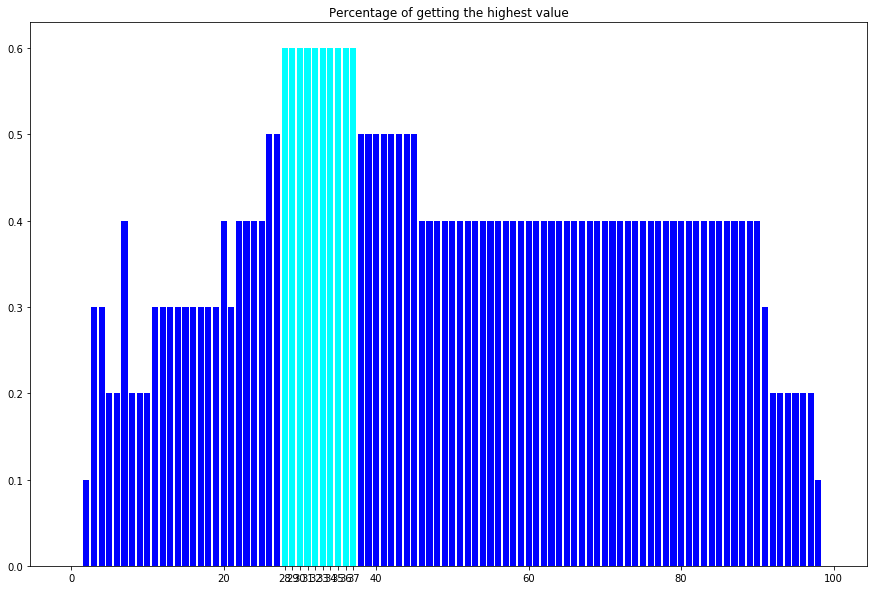

In [27]:
def count＿prob(m_array):
    return(np.sum(m_array == best_values)/simulate_freq)

xs_prob = np.apply_along_axis(count_prob, axis=1, arr=result)
best_m = np.argwhere(xs_prob == np.amax(xs_prob)).flatten()

fig, ax1 = plt.subplots(figsize=(15,10))
xs = np.linspace(0, m_scale-1, m_scale)

bars_color = np.full(m_scale, "blue")
bars_color[best_m] = "cyan" # the best performance m will have different color
xs_ticks = np.linspace(0, m_scale, 6)
xs_ticks = np.insert(xs_ticks, 0, best_m)
xs_ticks = np.sort(xs_ticks)

ax1.bar(xs, xs_prob, color=bars_color)
ax1.set_xticks(xs_ticks)
ax1.set_title('Percentage of getting the highest value')

plt.show()

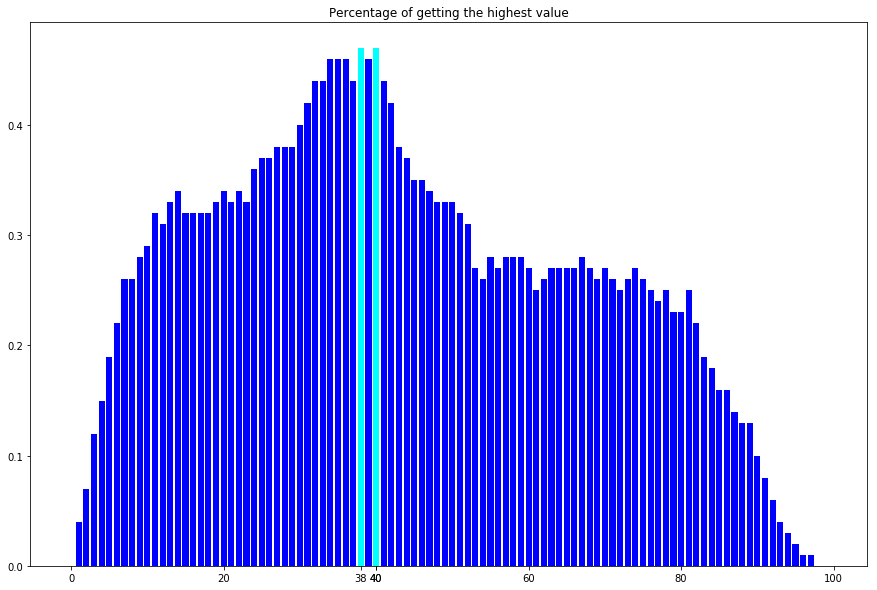

In [19]:
from Simulate import simulator
norm_sim = simulator(rv=rv, sample_size=100, simulate_freq=100, m_scale=100, sample_label='norm sample')
norm_sim.run(rv_plot=False, result_plot=False)

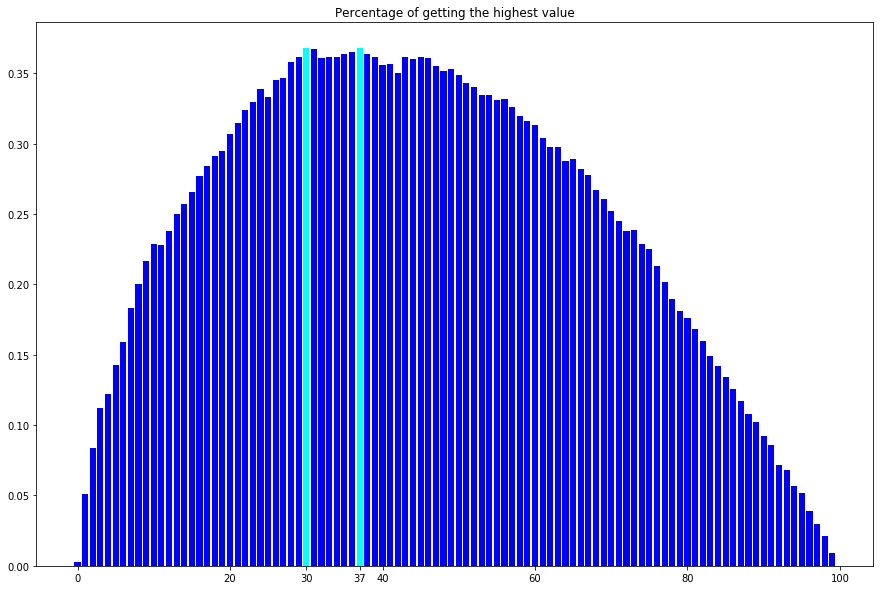

In [20]:
norm_sim = simulator(rv=rv, sample_size=1000, simulate_freq=1000, m_scale=100, sample_label='norm sample')
norm_sim.run(rv_plot=False, result_plot=False)

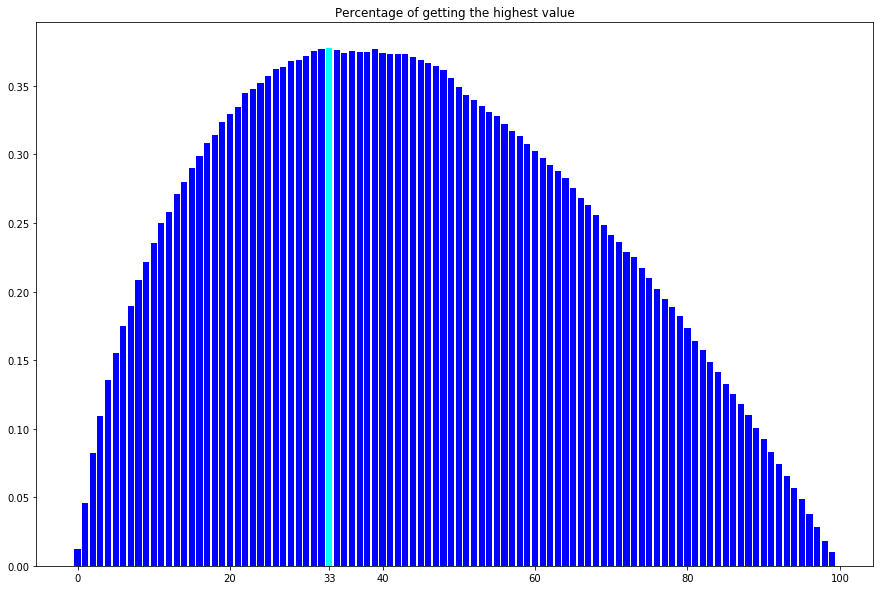

In [21]:
norm_sim = simulator(rv=rv, sample_size=100, simulate_freq=10000, m_scale=100, sample_label='norm sample')
norm_sim.run(rv_plot=False, result_plot=False)

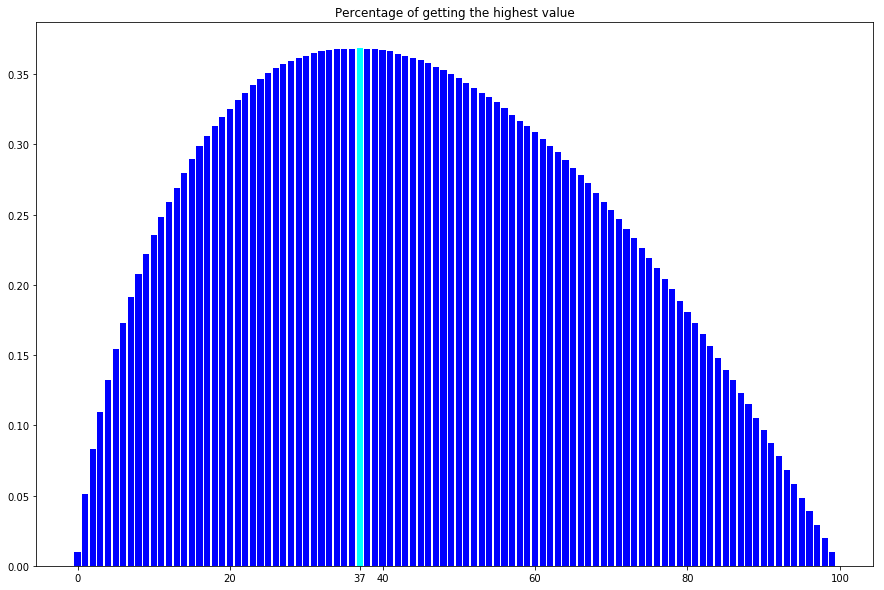

In [34]:
norm_sim = simulator(rv=rv, sample_size=100, simulate_freq=100000, m_scale=100, sample_label='norm sample')
norm_sim.run(rv_plot=False, result_plot=False)

We can see that when the simulation frequency grows, the result bar plot will have much clearer curve, and it is obvious that the better probability performance occur around 37.